# State Farm Data Scientist Opening Pre-employment Assessment

## 1. Data Peprocessing
### 1.1. Numeric Columns
#### 1.1.1. Preprocessing Considerations
### 1.2. Categorical Columns
#### 1.2.1. Preprocessing Considerations
#### Feature: x3 (Transformation)
#### Feature: x7 (Transformation)
#### Feature: x19 (Transformation)
#### Feature: x39 & x99 (Deletion)
#### Feature: x24 x31, x93, x3, x65, x77 (Encoding)
#### Feature: x33 & x60 (Transformation & Encoding)

## 2. Treating Missing Data
#### Feature: x44, x57, x30 (Deletion)
#### Data Imputation

## 3. Normalizing Data

## 4. Dimensionality Reduction (PCA)

## 5. Modeling
### 5.1. Logistic Regression
#### 5.1.1. Performance Evaluation
#### 5.1.2. Model Tuning
#### 5.1.3. Model Interpretation
### 5.2. Neural Network (MLP)
#### 5.2.1. Performance Evaluation
### 5.3. Comparing Two Models (AUC)

In [1]:
#Data preprocessing
import pandas as pd
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network  import MLPClassifier

#Model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, roc_auc_score 

#Statistics
from scipy.stats import pearsonr
import statsmodels.api as sm

## 1. Data Peprocessing

### 1.1. Numeric Columns

In [6]:
#There are 40,000 rows; 101 columns
#There are three different types of data: float, int, object
df_train = pd.read_csv('./exercise_40_train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(86), int64(3), object(12)
memory usage: 30.8+ MB


In [18]:
#numeric columns of float type
df_train.select_dtypes(include=['float64']).columns

Index(['x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13',
       'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x25',
       'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48',
       'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58',
       'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71',
       'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81', 'x82',
       'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92',
       'x94', 'x95', 'x96', 'x97', 'x100'],
      dtype='object')

In [19]:
#numeric columns of integer type
df_train.select_dtypes(include=['int64']).columns

Index(['y', 'x59', 'x98'], dtype='object')

In [46]:
#Three binary columns, including the dependent variable: y
df_train[df_train.select_dtypes(include=['int64']).columns]

,y,x59,x98
0,0,0,0
1,1,0,1
2,1,0,0
3,0,0,1
4,0,0,0
...,...,...,...
39995,0,0,1
39996,0,0,0
39997,0,0,1
39998,0,0,0


In [24]:
#discriptive statistics of numeric varoables
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
y,40000.0,0.145075,0.352181,0.000000,0.000000,0.000000,0.000000,1.000000
x1,40000.0,2.999958,1.994490,-3.648431,1.592714,2.875892,4.270295,13.837591
x2,40000.0,20.004865,1.604291,13.714945,18.921388,20.005944,21.083465,27.086468
x4,40000.0,0.002950,1.462185,-5.137161,-1.026799,0.002263,1.043354,5.150153
x5,37572.0,0.005396,1.297952,-5.616412,-0.872354,0.008822,0.892467,5.698128
...,...,...,...,...,...,...,...,...
x95,27396.0,0.031886,1.823091,-6.885150,-1.190682,0.001523,1.248742,7.631773
x96,33362.0,10.525530,1.437581,8.210456,9.397548,10.358355,11.448559,18.725468
x97,40000.0,10.002814,1.986984,1.911272,8.665103,9.994318,11.342574,17.861580
x98,40000.0,0.497650,0.500001,0.000000,0.000000,0.000000,1.000000,1.000000


### 1.1.1. Preprocessing Considerations

In [36]:
#Variables with zero std. can be dropped 
#As no variable is such, all columns are preserved for now 
df_stat_numeric=df_train.describe().T
df_stat_numeric[df_stat_numeric['std'] == 0].index

Index([], dtype='object')

### 1.2. Categorical Columns

In [20]:
#Categorical variables
df_train.select_dtypes(include=['object']).columns

Index(['x3', 'x7', 'x19', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77',
       'x93', 'x99'],
      dtype='object')

In [28]:
#disriptive statistics of categorical columns
df_train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
x3,40000,14,Wednesday,4930
x7,40000,663,0.0022%,193
x19,40000,40000,$1035.22894276985,1
x24,36144,2,female,18158
x31,40000,2,no,34022
x33,32829,51,California,3393
x39,40000,1,5-10 miles,40000
x60,40000,12,December,8136
x65,40000,5,progressive,10877
x77,30743,7,ford,9005


### 1.2.1. Preprocessing Considerations 

### Feature: x3 (Transformation)

In [38]:
#x3 seems to represent day but it has 14 distinct values
df_train.x3.value_counts()

Wednesday    4930
Monday       4144
Friday       3975
Tuesday      3915
Sunday       3610
Saturday     3596
Tue          2948
Thursday     2791
Mon          2200
Wed          2043
Sat          1787
Thur         1643
Fri          1620
Sun           798
Name: x3, dtype: int64

In [39]:
#Ensure that there is no blank space in names
df_train.x3.value_counts().index

Index(['Wednesday', 'Monday', 'Friday', 'Tuesday', 'Sunday', 'Saturday', 'Tue',
       'Thursday', 'Mon', 'Wed', 'Sat', 'Thur', 'Fri', 'Sun'],
      dtype='object')

In [48]:
#We must replace full name with abbreviations
df1=df_train.copy()
for i in [['Saturday','Sat'] , ['Sunday','Sun'] , ['Monday','Mon'] , 
           ['Tuesday','Tue'] , ['Wednesday','Wed'] , ['Thursday','Thur'] , ['Friday','Fri']]:
    df1.x3 = df1.x3.apply(lambda x: x.replace(i[0], i[1]))

In [49]:
df1.x3.value_counts()

Wed     6973
Tue     6863
Mon     6344
Fri     5595
Sat     5383
Thur    4434
Sun     4408
Name: x3, dtype: int64

### Feature: x7 (Transformation)

In [50]:
#x7 is % but it is recorded as string and we must change its type
df1.x7.value_counts()

0.0022%     193
0.0011%     189
-0.0016%    185
6e-04%      182
0.0019%     181
           ... 
-0.0312%      1
0.0297%       1
-0.0332%      1
-0.0315%      1
-0.0335%      1
Name: x7, Length: 663, dtype: int64

In [53]:
#first, remove %
df2=df1.copy()
df2.x7 = df2.x7.apply(lambda x: x.replace('%',''))

#Next, convert the data type from object to float
df2.x7 = df2.x7.astype(float)

In [54]:
df2.x7.describe()

count    40000.000000
mean         0.000033
std          0.009965
min         -0.043800
25%         -0.006700
50%          0.000100
75%          0.006800
max          0.037900
Name: x7, dtype: float64

### Feature: x19 (Transformation)

In [55]:
#x19 is $ but it is recorded as string and we must change its type
df2.x19.value_counts()

$1035.22894276985     1
$-795.181016386022    1
$426.003025315016     1
$-434.957625067756    1
$-607.21409856055     1
                     ..
$163.663024477943     1
$-510.592587936941    1
$-871.948544128586    1
$499.709501788034     1
$481.210302991852     1
Name: x19, Length: 40000, dtype: int64

In [56]:
#first, remove %
df2.x19 = df2.x19.apply(lambda x: x.replace('$',''))

#Next, convert the data type from object to float
df2.x19 = df2.x19.astype(float)

In [57]:
df2.x19.describe()

count    40000.000000
mean        -5.028013
std       1001.312630
min      -4166.106634
25%       -682.694719
50%          0.692233
75%        670.404666
max       3867.314061
Name: x19, dtype: float64

### Feature: x39 & x99 (Deletion)

In [61]:
#x39 & x99 have only one value and can be dropped
df3=df2.copy()
df3.drop(['x39' , 'x99'], axis = 1, inplace = True)
df3.shape

(40000, 99)

### Feature: x24 x31, x93, x3, x65, x77 (Encoding)

In [62]:
#ML models are better trained and interpreted over numeric inputs. 
#As such, we should decide about encoding existing classes of categorical columns
#x24 x31, x93 are binary and can be directly binarized with dummies 
dummy_cat_df1 = pd.get_dummies(df3[['x24', 'x31', 'x93']], drop_first=True) 
dummy_cat_df1.head()

,x24_male,x31_yes,x93_yes
0,0,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,1,1


In [63]:
df4=df3.copy()
# Dropping categorical variables
df4.drop(['x24', 'x31', 'x93'], axis = 1, inplace = True) 

# Adding the newly created dummy variables
df4 = pd.concat([df4, dummy_cat_df1], axis = 1) 

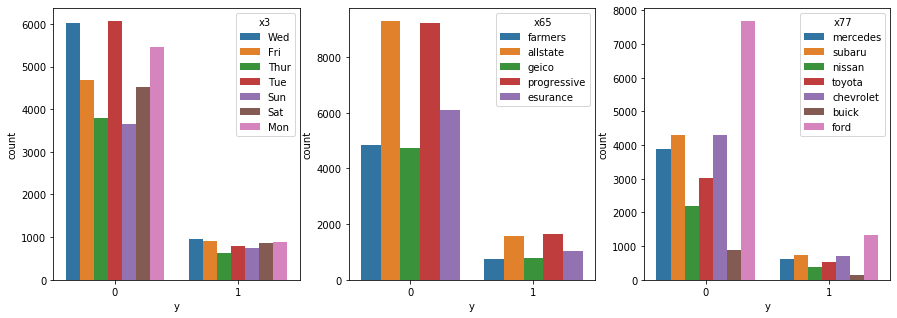

In [94]:
#x3, x65, x77 include 7,5,7 classes, repectively
#Before jumping to encoding, it is worth looking at distribution of y across each level
plt.figure(figsize=(15,5))
plt.subplot(131)
_=sns.countplot(x='y' , hue = 'x3', data = df4)
plt.subplot(132)
_=sns.countplot(x='y' , hue = 'x65', data = df4)
plt.subplot(133)
_=sns.countplot(x='y' , hue = 'x77', data = df4)

In [70]:
#Above charts indicate consistent variation of both classes of y across the classes of all three variables
#Let's replace each class with its assosiated dummy 
#But before that, we need to address missing values of x77. I replace nulls with the mode of the column
df5=df4.copy()
df5['x77'].fillna(df5['x77'].mode(), inplace = True)

In [72]:
dummy_cat_df2 = pd.get_dummies(df5[['x3', 'x65', 'x77']], drop_first=True) 
dummy_cat_df2.head()

,x3_Mon,x3_Sat,x3_Sun,x3_Thur,x3_Tue,x3_Wed,x65_esurance,x65_farmers,x65_geico,x65_progressive,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota
0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [74]:
df6=df5.copy()
df6.drop(['x3', 'x65', 'x77'], axis = 1, inplace = True) 
df6 = pd.concat([df6, dummy_cat_df2], axis = 1) 

### Feature: x33 & x60 (Transformation & Encoding)

In [75]:
# x33(name of states) & x60 (Month) have many levels (51 and 12, respectively).
# I decide to aggregate them in fewer levels to avoid redundant dimentions in the data
# Four geographical zones for states and quarter instead of month
df6.x33.value_counts()

California        3393
Texas             2252
Florida           1802
New York          1714
Illinois          1240
Pennsylvania      1233
Ohio              1114
Michigan           982
Georgia            918
North Carolina     910
New Jersey         870
Virginia           791
Washington         750
Tennessee          690
Indiana            674
Arizona            665
Massachusetts      638
Wisconsin          635
Missouri           634
Minnesota          611
Maryland           581
Alabama            554
Colorado           530
Louisiana          501
South Carolina     491
Kentucky           478
Oregon             452
Connecticut        422
Oklahoma           397
Kansas             378
Nevada             373
Utah               370
Mississippi        361
Iowa               353
Arkansas           346
New Mexico         333
Nebraska           323
West Virginia      305
Hawaii             282
Idaho              277
Maine              247
Rhode Island       246
New Hampshire      231
Vermont    

In [83]:
NE=(
    'Maine, Massachusetts, Rhode Island, Connecticut, New Hampshire, Vermont, New York, Pennsylvania, New Jersey, Delaware, Maryland'
   ).split(', ')

S=(
    'West Virginia, Virginia, Kentucky, Tennessee, North Carolina, South Carolina, Georgia, Alabama, Mississippi, Arkansas, Louisiana, Florida, Texas, Oklahoma, New Mexico, Arizona'
    ).split(', ')

MW=(
    'Ohio, Indiana, Michigan, Illinois, Missouri, Wisconsin, Minnesota, Iowa, Kansas, Nebraska, South Dakota, North Dakota'
    ).split(', ')

W = (
    'Colorado, Wyoming, Montana, Idaho, Washington, Oregon, Utah, Nevada, California, Alaska, Hawaii'
    ).split(', ')

west_dict = {i:"West" for i in W}
midwest_dict = {i:"Midwest" for i in MW}
south_dict = {i:"South" for i in S}
northeast_dict = {i:"Northeast" for i in NE}
d = {**west_dict, **midwest_dict, **south_dict, **northeast_dict}
df6['x33_region'] = df6['x33'].map(d)

df6.x33_region.value_counts()

South        11794
Midwest       7308
West          6987
Northeast     6554
Name: x33_region, dtype: int64

In [87]:
Q1 = ['January', 'February', 'March']
Q2 = ['April', 'May', 'June']
Q3 = ['July', 'August', 'September']
Q4 = ['October', 'November', 'December']

q1_dict = {i:"Q1" for i in Q1}
q2_dict = {i:"Q2" for i in Q2}
q3_dict = {i:"Q3" for i in Q3}
q4_dict = {i:"Q4" for i in Q4}
e = {**q1_dict, **q2_dict, **q3_dict, **q4_dict}
df6['x60_quarter'] = df6['x60'].map(e)

df6.x60_quarter.value_counts()

Q3    17064
Q4     9972
Q1     9942
Q2     3022
Name: x60_quarter, dtype: int64

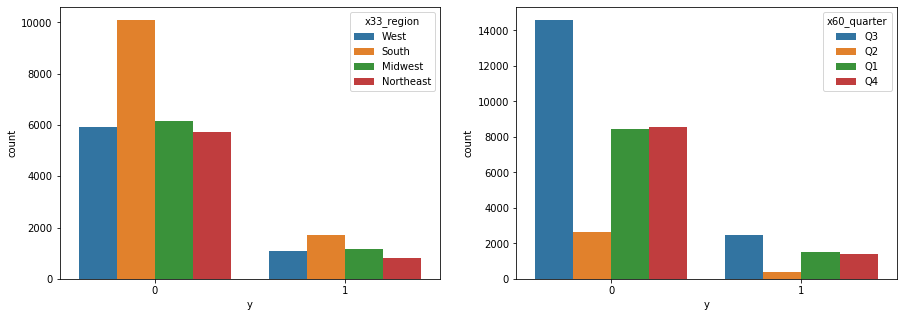

In [93]:
#Let's visualize the distribution across the newly-generated variables
plt.figure(figsize=(15,5))
plt.subplot(121)
_=sns.countplot(x='y' , hue = 'x33_region', data = df6)
plt.subplot(122)
_=sns.countplot(x='y' , hue = 'x60_quarter', data = df6)

In [88]:
dummy_cat_df3 = pd.get_dummies(df6[['x33_region', 'x60_quarter']], drop_first=True) 
dummy_cat_df3.head()

df7=df6.copy()
df7.drop(['x33', 'x60', 'x33_region', 'x60_quarter'], axis = 1, inplace = True) 
df7 = pd.concat([df7, dummy_cat_df3], axis = 1) 

#df7.to_pickle('./df_train_preprocessed_1.pkl')
#df7 = pickle.load( open( "df_train_preprocessed_1.pkl", "rb" ) )

## 2. Treating Missing Data

In [4]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 116 entries, y to x60_quarter_Q4
dtypes: float64(88), int64(3), uint8(25)
memory usage: 28.7 MB


In [13]:
df7.select_dtypes(include = 'uint8').columns

Index(['x24_male', 'x31_yes', 'x93_yes', 'x3_Mon', 'x3_Sat', 'x3_Sun',
       'x3_Thur', 'x3_Tue', 'x3_Wed', 'x65_esurance', 'x65_farmers',
       'x65_geico', 'x65_progressive', 'x77_chevrolet', 'x77_ford',
       'x77_mercedes', 'x77_nissan', 'x77_subaru', 'x77_toyota',
       'x33_region_Northeast', 'x33_region_South', 'x33_region_West',
       'x60_quarter_Q2', 'x60_quarter_Q3', 'x60_quarter_Q4'],
      dtype='object')

### Feature: x44, x57, x30 (Deletion)

In [35]:
# As shown, variables x44, x57, x30 have more than 80% missing values and removal of these columns is a reasonable decision 
missing_cols = df7.columns[df7.isna().any()].tolist()
col_null = []
row_num = df7.shape[0]
for i in missing_cols:
    num_missing = df7[i].isna().sum()
    col_null.append((i , num_missing/row_num))

sorted(col_null, key=lambda x: x[1], reverse = True)

[('x44', 0.856175),
 ('x57', 0.8116),
 ('x30', 0.8084),
 ('x55', 0.4424),
 ('x52', 0.40455),
 ('x74', 0.3229),
 ('x49', 0.320575),
 ('x54', 0.3182),
 ('x95', 0.3151),
 ('x78', 0.284325),
 ('x16', 0.2803),
 ('x89', 0.267275),
 ('x14', 0.2466),
 ('x42', 0.243225),
 ('x85', 0.242875),
 ('x41', 0.237575),
 ('x45', 0.200225),
 ('x61', 0.182325),
 ('x96', 0.16595),
 ('x91', 0.131475),
 ('x80', 0.1314),
 ('x76', 0.131225),
 ('x75', 0.131125),
 ('x11', 0.12775),
 ('x64', 0.127525),
 ('x92', 0.060875),
 ('x26', 0.060825),
 ('x79', 0.06075),
 ('x5', 0.0607),
 ('x83', 0.0607),
 ('x67', 0.060625),
 ('x63', 0.0605),
 ('x86', 0.060175),
 ('x38', 0.06005),
 ('x22', 0.059675),
 ('x68', 0.0596),
 ('x94', 0.0585),
 ('x88', 0.058275)]

In [38]:
df8 = df7.copy()
df8.drop(columns = ['x44', 'x57', 'x30'], axis = 1, inplace = True)

col_null = []
for i in df8.columns[df8.isna().any()].tolist():
    num_missing = df8[i].isna().sum()
    col_null.append(i)
col_null    

['x5',
 'x11',
 'x14',
 'x16',
 'x22',
 'x26',
 'x38',
 'x41',
 'x42',
 'x45',
 'x49',
 'x52',
 'x54',
 'x55',
 'x61',
 'x63',
 'x64',
 'x67',
 'x68',
 'x74',
 'x75',
 'x76',
 'x78',
 'x79',
 'x80',
 'x83',
 'x85',
 'x86',
 'x88',
 'x89',
 'x91',
 'x92',
 'x94',
 'x95',
 'x96']

### Data Imputation

In [42]:
# I use median to impute data on other null values because medain is more robust to mean
imputer = SimpleImputer(strategy='median')

df9=df8.copy()

df9[col_null] = imputer.fit_transform(df9[col_null])

#Ensure the proper imputation
col_null = []
for i in df9.columns[df9.isna().any()].tolist():
    num_missing = df9[i].isna().sum()
    col_null.append(i)
col_null   

[]

## 3. Normalizing Data

In [44]:
#Normalization is applied over only non-binary features

#slice data for only float columns
numerical_cols = df9.select_dtypes(include=['float64']).columns

# Creates a column names for standardized values
new_cols = [i+'_standardized' for i in numerical_cols] 

# Converts the df[numerical_val] to numpy array
array1 = df9[numerical_cols].values 

# Creates standarization instance
data_scaler1 = StandardScaler().fit(array1) 

# Add the normalized numerical variables
df9[new_cols]= pd.DataFrame(data_scaler1.transform(array1), columns = new_cols)

df10 = df9.copy()

df10.drop(numerical_cols, axis=1, inplace = True)

df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 113 entries, y to x100_standardized
dtypes: float64(85), int64(3), uint8(25)
memory usage: 27.8 MB


In [45]:
#df10.to_pickle('./df_train_preprocessed_2.pkl')

## 4. Dimensionality Reduction (PCA)

In [57]:
# Due to large number of dimensions in this dataset, I decid to use PCA to reduce them.
# To begin with PCA, first I'd like to see significant correlation between variables because the goal of PCA is to
# integrate correlated variables into a single component.

# calculate correlation matrix and p-values
corr_matrix, significant_vars = df10.corr(method='pearson'), []

# Loop through each pair of variables and identify those with significant correlation (0.01 significance level)
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr, p_value = pearsonr(df10.iloc[:,i], df10.iloc[:,j])
        if p_value < 0.01:
            significant_vars.append((corr_matrix.columns[i], corr_matrix.columns[j], corr, p_value))

#sort based on the magnitude of the correlation
# As shown, a decent number of variables are significantly correlated which makes the implementation of PCA reasonable
sorted(significant_vars, key=lambda x: x[-2], reverse = True)

[('x36_standardized', 'x18_standardized', 0.6557741806886419, 0.0),
 ('x61_standardized', 'x36_standardized', 0.6198434832949772, 0.0),
 ('x61_standardized', 'x18_standardized', 0.5619600942527806, 0.0),
 ('x93_yes', 'x31_yes', 0.5241011424738303, 0.0),
 ('x69_standardized', 'x56_standardized', 0.5189067059848865, 0.0),
 ('x47_standardized', 'x36_standardized', 0.49065396485153745, 0.0),
 ('x97_standardized', 'x12_standardized', 0.4877589250342399, 0.0),
 ('x86_standardized', 'x73_standardized', 0.48727084450234215, 0.0),
 ('x47_standardized', 'x11_standardized', 0.4810580717062366, 0.0),
 ('x70_standardized', 'x50_standardized', 0.47750113513944675, 0.0),
 ('x83_standardized', 'x73_standardized', 0.4675366584155972, 0.0),
 ('x48_standardized', 'x17_standardized', 0.4628146135062119, 0.0),
 ('x86_standardized', 'x2_standardized', 0.46035696769558776, 0.0),
 ('x80_standardized', 'x62_standardized', 0.4530199472313522, 0.0),
 ('x47_standardized', 'x8_standardized', 0.4517302205190227, 0.

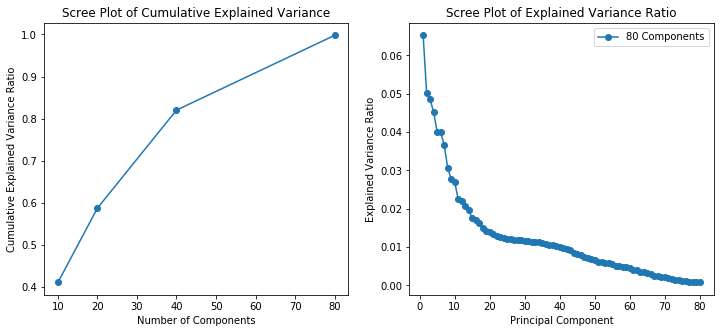

In [79]:
# I'll examine PCA over continous (float) variables and not encoded ones which are binary
df_pca = df10[df10.select_dtypes(include = 'float').columns]

# define range of components to test
n_components = [10,20,40,80]

explained_variances = {}
cumulative_variances = []

# perform PCA for each number of components and store results
for i in n_components:
    pca = PCA(n_components=i)
    
    # Fit the PCA object to your dataframe
    pca.fit(df_pca)
    
    transformed_data = pca.transform(df_pca)
       
    explained_variances[i] = pca.explained_variance_ratio_
    cumulative_variances.append(sum(explained_variances[i]))
    
# Create a scree plot of the cumulative explained variance and explained variance ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the cumulative explained variance
ax1.plot(n_components, cumulative_variances, '-o')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Cumulative Explained Variance Ratio')
ax1.set_title('Scree Plot of Cumulative Explained Variance')

# Plot the explained variance ratio
#for i in (n_components):
#    ax2.plot(range(1, i+1), explained_variances[i], '-o', label=f'{i} Components')
ax2.plot(range(1, max(n_components)+1), explained_variances[max(n_components)], '-o', label=f'{max(n_components)} Components')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Explained Variance Ratio')
ax2.set_title('Scree Plot of Explained Variance Ratio')
ax2.legend()

plt.show()

In [80]:
# based on scree plots, adding more than 40 components, improves the explained variance to a slight degree
# I decide to move forward with 40 components which explains ~80% of variation in the data

c_num=40
pca = PCA(n_components=c_num)
pca.fit(df_pca)
transformed_data = pca.transform(df_pca)

# Create a new dataframe with the principal components
pc_df = pd.DataFrame(data = transformed_data, columns = ['PC_'+str(i) for i in range(1, c_num+1)])
pc_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40
0,0.225612,0.825620,-2.284846,-3.079301,-0.817870,-1.188507,-2.683622,0.946255,0.757287,-1.252131,...,-1.989637,-1.001322,-0.612679,1.553906,-0.046099,-1.458568,0.919342,-1.574786,-0.525895,-0.265208
1,3.792992,-0.409013,1.999251,-2.708499,2.042952,-1.954545,0.613373,-0.476835,-2.485380,-2.286890,...,-0.554786,-0.376656,1.053065,-0.797668,-0.313948,-1.661062,0.831868,-0.632697,-0.819658,-1.124938
2,0.560720,-0.244868,4.448730,0.288572,-2.111189,1.433045,1.060118,-1.423897,0.550160,0.307228,...,-0.690643,-0.312257,0.851651,-0.672072,1.391164,0.155150,-1.200627,0.840377,-0.338982,2.335383
3,2.694568,-0.916063,0.891725,-0.719761,-0.501319,-0.421921,-0.018672,-1.903910,1.453597,-0.264513,...,0.348476,0.234170,-0.681716,-0.797723,0.818178,-2.129817,1.389311,-1.689824,0.038918,-1.181864
4,2.553926,-1.694159,1.864946,0.861158,1.687072,0.843231,-3.132389,-0.475672,0.892201,1.472078,...,-0.553831,-0.706116,2.360965,1.532579,2.258462,-0.255070,-2.334856,-0.438208,-0.762434,0.401518


In [87]:
# Access loadings for each variable
loadings = pd.DataFrame(pca.components_, columns=df_pca.columns)
loadings

,x1_standardized,x2_standardized,x4_standardized,x5_standardized,x6_standardized,x7_standardized,x8_standardized,x9_standardized,x10_standardized,x11_standardized,...,x88_standardized,x89_standardized,x90_standardized,x91_standardized,x92_standardized,x94_standardized,x95_standardized,x96_standardized,x97_standardized,x100_standardized
0,-0.010448,-0.028218,-0.006974,-0.000914,-0.002305,-0.003248,-0.225564,0.008017,0.085793,-0.181241,...,-0.069561,0.194561,0.164411,0.006439,-0.003259,0.012621,0.172986,-0.142645,0.006826,0.000010
1,-0.000985,-0.096150,-0.103222,0.040304,-0.238318,0.002506,-0.006742,0.250884,-0.028165,0.024162,...,0.008135,0.007660,0.005509,0.169298,-0.000416,0.085347,0.003354,0.008185,0.157658,0.202362
2,-0.005239,-0.003351,-0.002127,-0.006382,0.005619,0.001518,0.102480,0.013697,-0.069844,-0.161362,...,-0.089908,-0.159345,0.019732,0.040666,-0.005733,-0.012889,0.126812,-0.098276,0.017685,0.005184
3,-0.006870,0.299452,-0.188981,-0.084355,0.084892,-0.003395,-0.023590,-0.118629,0.002132,0.043659,...,-0.044336,0.027637,-0.081249,0.062664,-0.003801,-0.163562,0.038131,-0.023306,0.064312,-0.106554
4,0.000866,-0.000244,0.108177,-0.166469,0.047826,-0.003297,0.034814,0.188767,-0.030478,0.207361,...,-0.039827,0.089753,-0.119219,0.213135,0.009556,-0.115949,0.162190,-0.076329,0.092070,-0.074948
5,0.000140,0.000868,0.034273,-0.153634,0.044593,0.004069,-0.029555,0.128585,0.016933,-0.254637,...,0.051666,-0.110463,0.152582,0.187044,0.000415,-0.121364,-0.223740,0.093446,0.099697,-0.070455
6,-0.003679,-0.254736,-0.203006,0.200369,0.009010,-0.005652,-0.045198,0.119497,0.031652,0.013658,...,-0.006953,-0.005026,0.049999,-0.142304,-0.002351,-0.081202,0.008778,-0.016709,-0.076715,0.173565
7,0.005718,-0.029700,-0.016713,0.031612,0.019225,0.001110,0.113288,0.036476,-0.072646,0.053439,...,0.122255,0.003141,0.003661,0.036627,-0.008078,0.037971,0.033249,0.180794,-0.017129,0.030839
8,-0.018276,0.025845,0.112251,0.130333,-0.193517,-0.005672,0.128569,-0.189198,0.029920,0.055759,...,0.100642,0.070620,-0.036727,0.108850,0.010554,-0.025098,0.016754,0.038836,-0.198632,-0.059260
9,-0.012495,0.014456,-0.128091,-0.099375,0.200478,-0.003461,0.088521,0.162446,0.015128,0.059699,...,0.092706,0.070163,-0.031409,-0.076476,0.006551,0.098210,0.021360,0.063285,0.246074,0.088007


In [84]:
df11=df10.copy()
# Drops origional variables
df11.drop(df11.select_dtypes(include = 'float').columns, axis = 1, inplace = True) 

# Adds the newly created components
df11 = pd.concat([df11, pc_df], axis = 1) 

df11.to_pickle('./df_train_preprocessed_3.pkl')

df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 68 columns):
y                       40000 non-null int64
x59                     40000 non-null int64
x98                     40000 non-null int64
x24_male                40000 non-null uint8
x31_yes                 40000 non-null uint8
x93_yes                 40000 non-null uint8
x3_Mon                  40000 non-null uint8
x3_Sat                  40000 non-null uint8
x3_Sun                  40000 non-null uint8
x3_Thur                 40000 non-null uint8
x3_Tue                  40000 non-null uint8
x3_Wed                  40000 non-null uint8
x65_esurance            40000 non-null uint8
x65_farmers             40000 non-null uint8
x65_geico               40000 non-null uint8
x65_progressive         40000 non-null uint8
x77_chevrolet           40000 non-null uint8
x77_ford                40000 non-null uint8
x77_mercedes            40000 non-null uint8
x77_nissan              40000 non-nu

In [89]:
# We need to save the pca object to call it for generating the same components across pre-processed test set
with open('pca_model.pkl', 'wb') as file:
    pickle.dump(pca, file)

## 5. Modeling

In [92]:
# Before training the model, let's see to what extent data is imbalanced wrt y
# The positive class (y=1) is minority and includes ~15% of the outcome space
# Because there is no further information about the problem statment, we may not decisively say this level of imbalance 
# is critical or not. With that said, I train data without manipulating the target variable (i.e. oversampling/undersampling)
df11.y.value_counts()*100/df11.y.count()

0    85.4925
1    14.5075
Name: y, dtype: float64

In [111]:
Y = df11['y']
X = df11.drop(['y'], axis=1)

# Select 20% of data as test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## 5.1.Logistic Regression 

In [116]:
# Because this is a binary classification problem, I set multi_class argument as "ovr"
#I choose "lbfgs" solver because it is well-suited for a dataset with many features 
lr1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
lr1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

### 5.1.1. Performance Evaluation

In [135]:
#We need to check whether the model is overfitted or not
def overfit_model(model, X_train, X_test, Y_train, Y_test):
    model_perf = pd.DataFrame(columns = ['Accuracy' , 'Precision' , 'Recall' , 'F1_Score' , 'AUC'] , index = ['Train' , 'Test'])

    #prediction on train & test data
    Y_test_pred = model.predict(X_test)
    Y_train_Pred = model.predict(X_train)

    #Because I don't have a background on the problem, in this step I will look at few perfromance metrics 
    #However, because data is imbalanced Accuracy will not be a good choice

    model_perf['Accuracy']['Train'] = accuracy_score(Y_train, Y_train_Pred)
    model_perf['Accuracy']['Test'] = accuracy_score(Y_test, Y_test_pred)

    model_perf['Precision']['Train'] = precision_score(Y_train, Y_train_Pred)
    model_perf['Precision']['Test'] = precision_score(Y_test, Y_test_pred)

    model_perf['Recall']['Train'] = recall_score(Y_train, Y_train_Pred)
    model_perf['Recall']['Test'] = recall_score(Y_test, Y_test_pred)

    model_perf['F1_Score']['Train'] = f1_score(Y_train, Y_train_Pred)
    model_perf['F1_Score']['Test'] = f1_score(Y_test, Y_test_pred)

    model_perf['AUC']['Train'] = roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])
    model_perf['AUC']['Test'] = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])

    return model_perf 

In [136]:
#As shown, wrt AUC metric the model doesn't indicate overfitting issue; 
#however, wrt other other metrics, there is a slight overfitting
overfit_model(lr1, X_train, X_test, Y_train, Y_test)

,Accuracy,Precision,Recall,F1_Score,AUC
Train,0.856656,0.573557,0.0660094,0.118393,0.747213
Test,0.859125,0.546296,0.0518909,0.0947791,0.749327


In [139]:
#To have a better estimate of overfitting challenge over the unseen data, I use cross-validation with 3 folds.
# Although I don't have a background on the problem, but I decide to use Recall as the scoring metric for evaluation
kfold = KFold(n_splits=3, random_state=0, shuffle=True) 
lr2 = cross_val_score(lr1, X_train, Y_train, cv = kfold, scoring = "recall")
lr2

array([0.06614786, 0.0765206 , 0.05768025])

In [141]:
#As shown, on recall dimension, overfitting issue still seems to be a challenge
print(f"Mean score: {lr2.mean():.5f}")

Mean score: 0.06678


### 5.1.2. Model Tuning

In [143]:
#I create a third model by Ridge regularization method to see if it improves the results
#As shown, results remain the same and regularization doesn't address the moderate overfitting issue 
#The other soltion can be changing the features; however, due to the lack of background information and given that 
#we have alraedy reduced dimentions through feature engineering, I decide to acknowledge this level of overfitting.
lr3 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', penalty='l2', C=1.0)
lr3.fit(X_train, Y_train)
overfit_model(lr3, X_train, X_test, Y_train, Y_test)

,Accuracy,Precision,Recall,F1_Score,AUC
Train,0.856656,0.573557,0.0660094,0.118393,0.747213
Test,0.859125,0.546296,0.0518909,0.0947791,0.749327


In [144]:
with open('lr_model_1.pkl', 'wb') as file:
    pickle.dump(lr1, file)

### 5.1.3. Model Interpretation

In [196]:
# One advantage of logistic regression model is its interpretability.
# Using p-values and magnitude of respective coefficients, we can see which variables contribute to predcition the most 
# However, because the model we generated through sklearn module doesn't suggest a convinient way to observe these parameters,
# I fit a logit model through the stats package to have an understading of the associations
lr4 =sm.Logit(Y_train, X_train).fit()

# extract the coefficients and p-values
coef = lr4.params
pval = lr4.pvalues

# create a dataframe to display the results
results_df = pd.DataFrame({'coefficient': coef, 'p_value': pval}, index=lr4.params.index.tolist())

Optimization terminated successfully.
         Current function value: 0.372313
         Iterations 7


In [198]:
#I determine significant predictors at 0.01 significance level
#As shown, 52 out of 67 predictors are highly significant.
#In addition, it seems that the effect of binary classes is larger on the outcome as opposed to PCs. 
# binary classes: seasonality (weekdays, quarters), geographical location, vehicle brand, and gender 
# Aslo it is seen that the association of the outcome with these dummy variables is mostly negative 
# whereas that of PCs is mostly positive 
sign_predictors = results_df[results_df['p_value'] < 0.01]
sign_predictors['abs_coeff'] = sign_predictors['coefficient'].abs()
sign_predictors.sort_values(by = 'abs_coeff' , ascending = False)[['coefficient' , 'p_value']]

C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,coefficient,p_value
x3_Tue,-1.090688,2.027768e-88
x3_Wed,-0.838937,1.875529e-59
x93_yes,-0.832332,3.337734e-25
x3_Thur,-0.794350,2.125727e-40
x3_Mon,-0.762803,6.416735e-47
x31_yes,-0.664331,1.883714e-24
x3_Sat,-0.571959,1.575564e-26
x3_Sun,-0.520801,5.324304e-20
x33_region_Northeast,-0.499843,2.467809e-23
x60_quarter_Q2,-0.484121,3.364953e-12


## 5.2. Neural Network (MLP)

In [254]:
mlp0 = MLPClassifier(random_state=0)

params = {'hidden_layer_sizes': [(20,), (10,10), (10, 20), (5,5,5)],
          'activation': ['relu', 'sigmoid'], #sigmoid a a reasonable choice for output layer activation. For hidden layers, I choose relu
          'solver': ['adam'], #I choose 'adam' instead of 'sgd' as it converges faster for large and complex data
          'learning_rate': ['adaptive'], # I choose 'adaptive' as opposed to 'constant' & 'invscaling' because it is well-fitted for large data and addressing over-fitting challenge
          'alpha': [0.01, 0.1, 10] }# alpha can be adjusted to a larger value to reduce overfitting

# I set n_jobs to 4 as I don't want to use all CPUs
mlp1 = GridSearchCV(mlp0, params, cv=5, n_jobs=4, verbose = 0)

In [255]:
mlp1.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'activation': ['rel

In [256]:
# See the best parameters
mlp1.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (5, 5, 5),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [257]:
#fit the model with best parameters
mlp2 = MLPClassifier(**mlp1.best_params_)
mlp2.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5, 5), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### 5.2.2. Performance Evaluation

In [258]:
#As shown, in spit of regularization with large alpha parameter,
#the overfitting issue is more visible for MLP as opposed to the logistic regression model
#However, MPL suggests a slightly better performance across Recall, F1_Score and AUC dimensions than logistic regression
overfit_model(mlp2, X_train, X_test, Y_train, Y_test)

,Accuracy,Precision,Recall,F1_Score,AUC
Train,0.860187,0.625326,0.102658,0.176362,0.776906
Test,0.858375,0.510989,0.0817942,0.141016,0.755021


In [259]:
with open('mlp_model_1.pkl', 'wb') as file:
    pickle.dump(mlp2, file)

## 5.3. Comparing Two Models (AUC) 

In [261]:
# I'll use ROC curve to visualize the trade-off between TP & FP predictions by each model
# As shown before, predictions by both models are similar 
# with that said, if everthing remains the same, I'll choose logistic regression due to its interpretibility
# ROC curve & AUC measurer
def auc_func(inp_set, out_actual, models_fit):
    
    plt.figure()
    for name, model in models_fit: 
        out_prob=model.predict_proba(inp_set) 
        fpr, tpr, thresholds = roc_curve(out_actual, out_prob[:, 1])
        
        # Plot the curve      
        legend = name + ' (area = %0.2f)'
        plt.plot(fpr, tpr, lw=2, label=legend % auc(fpr, tpr))
        
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

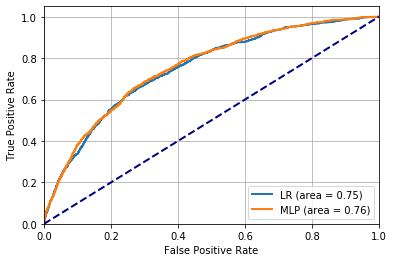

In [262]:
models_fit = [('LR' , lr1) , ('MLP' , mlp2)]
auc_func(X_test, Y_test, models_fit)